In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [2]:
df = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv", parse_dates=["dt"])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях. 


In [3]:
df = df[df["dt"] >= "01.01.1950"]
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

Text(0.5, 1.0, "Toronto's average temperature")

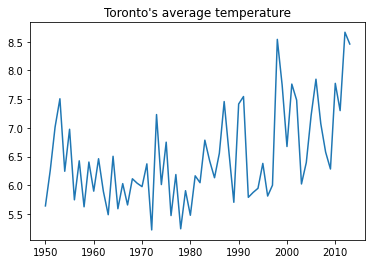

In [4]:
Toronto_average_temp = df[df["City"]=="Toronto"]
plt.plot(Toronto_average_temp.groupby(Toronto_average_temp.dt.dt.year).AverageTemperature.mean())
plt.title("Toronto's average temperature")

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [5]:
max_var_city = df.groupby(df.City).AverageTemperature.var().idxmax()
print(f"The maximum temperature variance was observed in {max_var_city}.")

The maximum temperature variance was observed in Harbin.


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [6]:
def formatting_latitude(latitude: str) -> float:
    if 'N' in latitude:
        return float(latitude.replace("N", ""))
    elif "S" in latitude:
        return -1 *float(latitude.replace("S", ""))
    else:
        print(f"Latitude value is probably malformed: {latitude}")
        return np.nan

In [7]:
df.Latitude = df.Latitude.map(formatting_latitude)
df = df.dropna()

In [8]:
var_latitude = df.groupby(df.Latitude).AverageTemperature.var()

In [9]:
january = df[(df.dt.dt.year == 1975) & (df.dt.dt.month == 1)]
january = january.groupby(january.Latitude).AverageTemperature.mean()

In [10]:
july =  df[(df.dt.dt.year == 1975) & (df.dt.dt.month == 7)]
july = july.groupby(july.Latitude).AverageTemperature.mean()

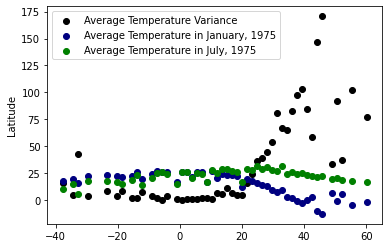

In [11]:
fig = plt.figure()
plt.scatter(x=var_latitude.index, y=var_latitude.values,label="Average Temperature Variance", color="black")
plt.scatter(x=january.index, y=january.values, label="Average Temperature in January, 1975", color="navy")
plt.scatter(x=july.index, y=july.values, label="Average Temperature in July, 1975", color="green")

plt.ylabel("Latitude")
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
spb = df[df.City == "Saint Petersburg"]
spb = spb.groupby(df.dt.dt.year).AverageTemperature.mean()
hotter_years = spb[(spb > spb.shift(1)) & (spb > spb.shift(-1))]

X = spb.index.array.reshape(-1,1)
y = spb.values.reshape(-1,1)

In [14]:
model = LinearRegression().fit(X,y)

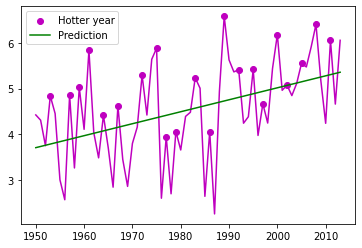

In [15]:
plt.scatter(hotter_years.index, hotter_years.values, color="m", label="Hotter year")
plt.plot(spb.index, spb.values, color="m")
plt.plot(spb.index, model.predict(X), label="Prediction", color="g")
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [17]:
cities = df.groupby(df.City)
max_diff = cities.AverageTemperature.max().subtract(cities.AverageTemperature.min())

print(f"The city with maximum temperature difference is {max_diff.idxmax()}.")
max_diff.sort_values(ascending=False)

The city with maximum temperature difference is Harbin.


City
Harbin              49.279
Changchun           46.542
Moscow              43.523
Shenyang            41.216
Saint Petersburg    40.510
                     ...  
Lagos                4.058
Cali                 4.008
Bogotá               3.744
Singapore            3.665
Jakarta              3.363
Name: AverageTemperature, Length: 100, dtype: float64

In [25]:
january_city = (df[df.dt.dt.month == 1].groupby(df.City).AverageTemperature.mean())
july_city = (df[df.dt.dt.month == 7].groupby(df.City).AverageTemperature.mean())

diff = (january_city.subtract(july_city)).abs()

print(f"City with maximum difference between average January and July temperature is {diff.idxmax()}.")
diff.sort_values(ascending=False)

City with maximum difference between average January and July temperature is Harbin.


City
Harbin       41.992719
Changchun    39.603719
Shenyang     34.927016
Montreal     31.169109
Tianjin      30.658703
               ...    
Lagos         0.317484
Jakarta       0.289859
Surabaya      0.238172
Bogotá        0.200234
Cali          0.161625
Name: AverageTemperature, Length: 100, dtype: float64

In [26]:
#Let's say there are 30 days on average in a month
neg_temp = df[df.AverageTemperature < 0.0]
neg_months = neg_temp.groupby([neg_temp.City, neg_temp.dt.dt.year]).AverageTemperature.count().agg(lambda x: x / 30)
neg_months = neg_months.reset_index().groupby("City").AverageTemperature.mean()
print(f"City with maximum average amount of months per year with negative temperature is {neg_months.idxmax()}.")
neg_months.sort_values(ascending=False)

City with maximum average amount of months per year with negative temperature is Harbin.


City
Harbin              0.163542
Changchun           0.161458
Moscow              0.151562
Montreal            0.142187
Saint Petersburg    0.137500
Toronto             0.130729
Shenyang            0.125000
Kiev                0.111979
Taiyuan             0.107813
Dalian              0.091667
Peking              0.086979
Tianjin             0.086979
Seoul               0.077957
Tangshan            0.076563
New York            0.075956
Xian                0.061828
Chicago             0.056463
Santiago            0.053216
Ankara              0.052713
Mashhad             0.050667
Jinan               0.048889
Berlin              0.048062
London              0.040000
Tokyo               0.040000
Paris               0.038889
Rome                0.033333
Madrid              0.033333
Kabul               0.033333
Chengdu             0.033333
Nanjing             0.033333
Name: AverageTemperature, dtype: float64

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [27]:
def formatting_longitude(long: str) -> float:
    if "W" in long:
        return -1 * float(long.replace("W", ""))
    elif "E" in long:
        return float(long.replace("E", ""))
    else:
        print(f"Longitude value is probably malformed: {long}")
        return np.nan

In [28]:
df.Longitude = df.Longitude.map(formatting_longitude)
df = df.dropna()
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63,-3.23
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63,-3.23
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63,-3.23
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63,-3.23
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63,-3.23
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56,108.97
239172,2013-05-01,18.979,0.807,Xian,China,34.56,108.97
239173,2013-06-01,23.522,0.647,Xian,China,34.56,108.97
239174,2013-07-01,25.251,1.042,Xian,China,34.56,108.97


In [29]:
last_10 = df[df.dt.dt.year >= (df.dt.dt.year.max() - 10)]
last_10.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1848,2003-01-01,27.590,0.477,Abidjan,Côte D'Ivoire,5.63,-3.23
1849,2003-02-01,28.863,0.379,Abidjan,Côte D'Ivoire,5.63,-3.23
1850,2003-03-01,28.980,0.383,Abidjan,Côte D'Ivoire,5.63,-3.23
1851,2003-04-01,28.169,0.282,Abidjan,Côte D'Ivoire,5.63,-3.23
1852,2003-05-01,27.910,0.247,Abidjan,Côte D'Ivoire,5.63,-3.23


In [30]:
january_city = last_10[last_10.dt.dt.month == 1].groupby(last_10.City)
coordinates = pd.DataFrame(
    {
        "t": january_city.AverageTemperature.mean().values,
        "latitude": january_city.Latitude.max().values,
        "longitude": january_city.Longitude.max().values,
    },
    index=last_10.City.unique(),
)
coordinates = coordinates.sort_values("t", ascending=False)
coordinates['City'] = coordinates.index
coordinates = coordinates.reset_index().drop("index", axis=1)
coordinates.head()

,t,latitude,longitude,City
0,28.436000,-7.23,39.73,Dar Es Salaam
1,28.013727,-4.02,-40.98,Fortaleza
2,27.806818,7.23,4.05,Ibadan
3,27.331455,2.41,45.80,Mogadishu
4,27.310909,5.63,-3.23,Abidjan


In [55]:
import folium
import geopandas
import colour

heat_grad = list(colour.Color("red").range_to(colour.Color("blue"), len(coordinates.index)))

geometry = geopandas.points_from_xy(coordinates.longitude, coordinates.latitude)
geo = geopandas.GeoDataFrame(coordinates, geometry=geometry)
temp_map = folium.Map(zoom_start=15, tiles="CartoDB positron")
geo.apply(
    lambda x: folium.Marker(
        location=[x.latitude, x.longitude],
        popup=x.City,
        icon=folium.Icon(
            prefix = "fa",
            icon ="fa-thin fa-city",
            color="cadetblue",
            icon_color=heat_grad[x.name].hex,
        ),
    ).add_to(temp_map),
    axis=1,
)

temp_map